# Automated Solutions for the Challenges

The main goal of this notebook is to offer automatic solutions for the challenges listed in the "code_challenge.csv" file. These solutions will be generated automatically using five different programming languages, showcasing their versatility and applicability. Additionally, the notebook will leverage ChatGPT, an AI language model, to aid in the generation of these automatic solutions.

By combining the power of multiple programming languages and the capabilities of ChatGPT, the notebook aims to streamline the process of providing code solutions for a diverse range of challenges. 

Overall, the notebook seeks to demonstrate the potential of using AI in conjunction with various programming languages to automate code generation for a wide array of challenges, fostering efficiency and innovation in the programming community.

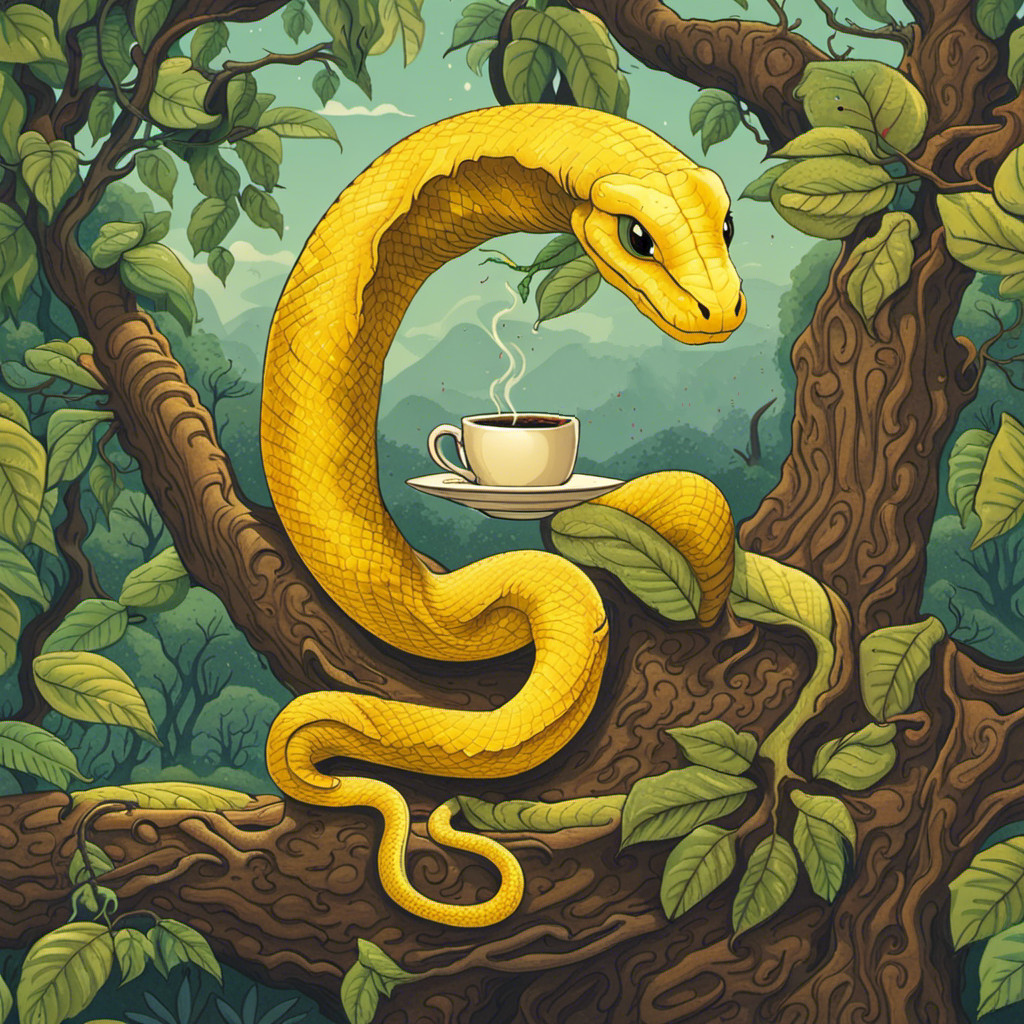

## Top Five Versatile Programming Languages

Here are the top 5 most versatile programming languages:

1. Python - Python is one of the most popular and versatile languages used today. It's easy to learn and can be used for a wide range of applications like web development, data analysis, artificial intelligence, scientific computing, and more.

2. JavaScript - JavaScript is the language of the web. It powers dynamic web pages and web applications and can also be used for game development, mobile apps, servers, IoT devices and more. 

3. Java - Java is a widely used object-oriented language suitable for a variety of applications like web servers, Big Data analysis, enterprise applications and Android app development. Its portability across platforms is a big plus.

4. C# - C# works across multiple platforms like Windows, mobile, and web. It is used for desktop apps, mobile apps, web apps, web services, games, VR, databases, and enterprise software. 

5. C++ - C++ is a high-performance language used to build systems, drivers, games engines, desktop apps and also has applications in embedded systems. It offers direct hardware manipulation and is highly efficient.

Other versatile options are C, Go, Swift, Kotlin, PHP, and Rust but Python, JavaScript, Java, C# and C++ cover the broadest range of application domains and are most widely used in the industry. Their popularity, vast ecosystems and support make them a great choice.

##  Loading, Preprocessing, and Displaying CSV Data

In [ ]:
import pandas as pd
from cryptography.fernet import Fernet
import os
import getpass
from cryptography.fernet import Fernet
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.backends import default_backend
import os
import getpass
import base64
import requests
import openai
import time

In [ ]:
df = pd.read_csv('code_challenge.csv', delimiter=';', encoding='latin') 

# Drop index column
df = df.reset_index(drop=True) 

# Display dataframe again
display(df)

## Filtering for Beginner-Level Challenges

In [ ]:
beginner_df = df.loc[df['difficulty'] == 'Beginner']
len(beginner_df)

## Encrypting the ChatGPT API into a File

In [ ]:
# Function to generate a random salt
def generate_salt():
    return os.urandom(16)

def generate_fernet_key(password, salt):
    password = password.encode()
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = base64.urlsafe_b64encode(kdf.derive(password))
    return key

def save_encrypted_api_key():
    api_key = input("Enter your API key: ")
    password = getpass.getpass("Enter your password: ")

    # Generate a random and secure salt
    salt = generate_salt()

    # Derive the Fernet key from the password and salt
    key = generate_fernet_key(password, salt)

    # Encrypt the API key
    cipher_suite = Fernet(key)
    encrypted_api_key = cipher_suite.encrypt(api_key.encode())

    with open("api_key.enc", "wb") as file:
        file.write(encrypted_api_key)

    with open("salt.bin", "wb") as file:
        file.write(salt)

    print("API key encrypted and saved successfully.")

## Accessing the Encrypted File to Obtain the API Ke

In [ ]:
def get_decrypted_api_key(password):
    try:
        with open("api_key.enc", "rb") as file:
            encrypted_api_key = file.read()

        with open("salt.bin", "rb") as file:
            salt = file.read()

        # Derive the Fernet key from the password and base64-decode the salt
        key = generate_fernet_key(password, salt)

        cipher_suite = Fernet(key)
        decrypted_api_key = cipher_suite.decrypt(encrypted_api_key).decode()

        return decrypted_api_key
    except FileNotFoundError:
        print("API key file not found.")
        return None
    except Exception as e:
        print("Error occurred while decrypting the API key:", str(e))
        return None

# Prompt user for the password again to decrypt the API key
password_for_decryption = getpass.getpass("Enter your password to decrypt the API key: ")

# Retrieve and decrypt the API key
api_key = get_decrypted_api_key(password_for_decryption)

## Generating Python Solutions for Code Challenges Using ChatGPT

In [ ]:
def generate_python_code(prompt, api_key):
    api_url = "https://api.openai.com/v1/chat/completions"

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    data = {
        "model": "gpt-3.5-turbo",  # You can choose other models if needed
        "messages": [
            {"role": "system", "content": f"You are a python programmer. Write a Python program to {prompt}. Generate only the python code without any additional comments."},
            {"role": "user", "content": prompt}
        ]
    }

    response = requests.post(api_url, headers=headers, json=data)

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        print(f"Request failed with status code: {response.status_code}")
        return None
    
    
def create_python_file(save_path, file_name, code_string):
    try:
        file_path = os.path.join(save_path, "code_challenge_solution", "python", file_name)
        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        with open(file_path, "w",  encoding="utf-8") as file:
            file.write(code_string)
        print(f"Python file '{file_name}' created successfully.")
    except Exception as e:
        print(f"An error occurred while creating the file: {file_name}", str(e))

current_path = os.getcwd()
for index, row in beginner_df.iterrows():
    # Access values of each column for the current row
    id_val = row['id']
    name_val = row['name']
    description_val = row['description']
    difficulty_val = row['difficulty']
    
    code_challenge_row = name_val + ' ' + description_val
    code_string = generate_python_code(code_challenge_row, api_key)
    file_name = f"{id_val} {name_val}.py"
    create_python_file(current_path, file_name, code_string)
    time.sleep(23)

## Generating JavaScript Solutions for Code Challenges Using ChatGPT

## Generating Java Solutions for Code Challenges Using ChatGPT

## Generating C# Solutions for Code Challenges Using ChatGPT

## Generating C++ Solutions for Code Challenges Using ChatGPT

We apologize for the inconvenience. This section is currently under construction and will be available soon. Thank you for your patience.

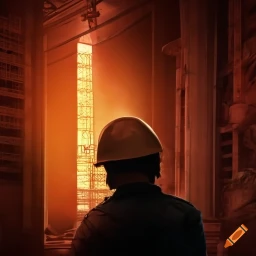